# Tutorial about analysis routines

# Nearest neighbor distances

In [1]:
from pathlib import Path

%matplotlib inline

import matplotlib.pyplot as plt

import locan as sp

In [2]:
sp.show_versions(system=False, dependencies=False, verbose=False)


Locan:
   version: 0.7.dev3+gb9aca40

Python:
   version: 3.8.8


## Load rapidSTORM data file

Identify some data in the test_data directory and provide a path using pathlib.Path

In [3]:
path = sp.ROOT_DIR / 'tests/Test_data/rapidSTORM_dstorm_data.txt'
print(path, '\n')

dat = sp.load_rapidSTORM_file(path=path, nrows=1000)

c:\users\soeren\mydata\programming\python\projects\locan\locan\tests\Test_data\rapidSTORM_dstorm_data.txt 



Print information about the data: 

In [4]:
print(dat.data.head(), '\n')
print('Summary:')
dat.print_summary()
print('Properties:')
print(dat.properties)

   position_x  position_y  frame  intensity  chi_square  local_background
0     9657.40     24533.5      0   33290.10   1192250.0           767.733
1    16754.90     18770.0      0   21275.40   2106810.0           875.461
2    14457.60     18582.6      0   20748.70    526031.0           703.370
3     6820.58     16662.8      0    8531.77   3179190.0           852.789
4    19183.20     22907.2      0   14139.60    448631.0           662.770 

Summary:
identifier: "1"
comment: ""
creation_date: "2021-03-04 13:45:48 +0100"
modification_date: ""
source: EXPERIMENT
state: RAW
element_count: 999
frame_count: 48
file_type: RAPIDSTORM
file_path: "c:\\users\\soeren\\mydata\\programming\\python\\projects\\locan\\locan\\tests\\Test_data\\rapidSTORM_dstorm_data.txt"

Properties:
{'localization_count': 999, 'position_x': 16066.234912912912, 'position_y': 17550.369092792796, 'region_measure_bb': 1064111469.8204715, 'localization_density_bb': 9.388114199807877e-07, 'subregion_measure_bb': 130483.2086

## Visualization

<AxesSubplot:title={'center':'counts'}, xlabel='position_x', ylabel='position_y'>

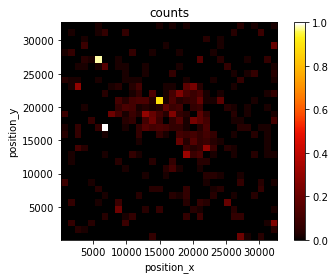

In [5]:
sp.render_2d(dat, bin_size=1000, rescale=(0,100));

## Analyze nearest neighbor distances

The k-nearest neighbor distances can be analyzed for all localizations or a random subset.

In [6]:
nn = sp.NearestNeighborDistances()

In [7]:
nn.compute(dat)
nn.results.head()

,nn_distance,nn_index
0,909.435242,276
1,54.429771,38
2,5.385165,30
3,5.047187,706
4,3.544009,27


The histogram shows the experimental distribution and for comparision the expectation for a spatial distribution of complete spatial randomness given the experimental localization density (per default relative to the minimum bounding box region).

<AxesSubplot:title={'center':'k-Nearest Neigbor Distances\n (k = 1)'}, xlabel='distance (nm)', ylabel='pdf'>

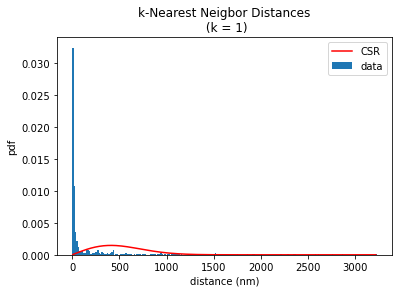

In [8]:
nn.hist();

The localization_density relative to the minimum bounding box region is retweated by the localization_density attribute.

In [9]:
nn.localization_density

9.388114199807877e-07

## Meta data for the analysis procedure

In [10]:
nn.meta

identifier: "1"
creation_date: "2021-03-04 13:45:48 +0100"
method {
  name: "NearestNeighborDistances"
  parameter: "{\'k\': 1}"
}